<a href="https://colab.research.google.com/github/ashioyajotham/ML-Algorithms/blob/main/WiML_Symposium_2022_Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2022 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

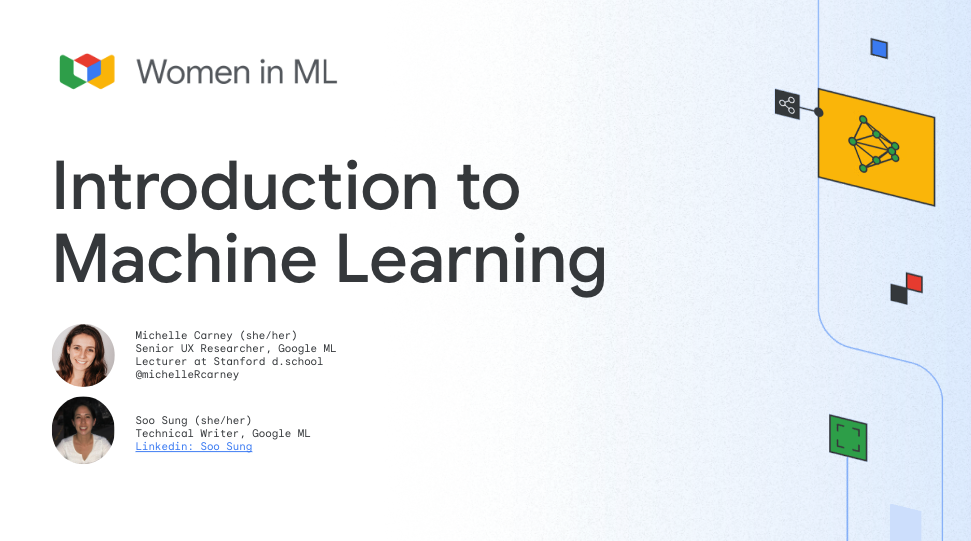

# Welcome to Women in ML 2022 - Intro to ML for everyone! 🤖📊✨

http://bit.ly/WiML22_introML



We're your hosts, [Michelle Carney🐍](https://twitter.com/michellercarney) and [Soo Sung🐼](https://www.linkedin.com/in/soo-sung-98180a15/)!

Our goal is to share how easy it is to get started with ML, especially using TensorFlow. Both of us are not engineers, but because of the awesome documentation online and the amazing advancement in tools - anyone can get started with ML!


### Wait... what is this tool we're using?! in the browser?! to CODE?!

For this workshop, we are using the coding language [python](https://www.python.org/), one of the most common ML coding laguagues.

You are able to run the code for yourself since we're using [colab notebooks](https://research.google.com/colaboratory/faq.html) which are kinda like Google Docs of Python (based on the open source library of [jupyter](https://jupyter.org/) - formerly iPython notebooks (notice how this file type is ipynb? now you know!)).

We won't go into the details, but essentially colab makes it really easy to run and share our code in our browsers without needing to code in terminal or using a text editor, which you might use when making a website or coding with html/css and javascript.

# Intro to Machine Learning 🤖

Here's what we will cover today:

1.   What is ML? 🤔💭🤖
2.   Data prep 🐧🐧🐧
3.   Training your model 🏋🏻‍♀️💪
4.   Model evaluation 📊🔍👀
5.   Next steps... and more! 🏆✨

In this notebook, we'll walk through a high level overview of how ML models *generally* work - esp. what are the different steps we take in order to build a model. This lays the foundation for talking about ML, key terms, and how to help you learn!

Hopefully at the end, you are able to better understand how models are made, and the vocabulary used in ML and AI, and have a little more confidence to start your ML journey 🏆




## What is machine learning? 🤔💭 🤖




Machine learning is the process of teaching a computer to learn patterns from data and then to apply those patterns to make preditions on new data. In traditional programming, you write rules to tell the computer exactly what to do. For example, if you want to write a program that converts temperature from Celsius to Fahrenheit, you would write a function that computes the following equation:

<span>
<img src="https://drive.google.com/uc?id=1-_B0RFGgdr-_5yXhFFc2QQGXjcZE5hoH" width="40%"/>

<img src="https://drive.google.com/uc?id=1du13knfyFKROE1qND0IQrijnd63O8pPu" width="40%"/>
</span>

But in ML, instead of writing the rule, you provide the computer a lot of examples of input data as well as the desired output, say pairs of celsius and fahrenheit data. Then let the computer learn the rule itself.



This particular case is very simple but imagine if you had to write a program to recognize `SPAM` emails. You could write some rules based on commonly found words in `SPAM` emails. But many of those words are also used in `non-SPAM` emails. You'd have to write many exception rules. You can see how the list of rules and their exceptions could grow very quickly.

ML is ideal for these types of problems, where you have lots of data that have complex relationships that would be very difficult for humans to manually create rules for.

* `SPAM` detection
* Recommendations
* Image and video recognition
* etc


If you're interested in a more in depth look at these concepts - check out the [Intro to ML](https://developers.google.com/machine-learning/intro-to-ml) course on the Google developer site!



## ML Model and Dataset 📊





Now that you've seen the difference between ML and traditional programming, let's get started on programming, or training, our own model!

For this workshop, we'll be using the [Palmer's Penguins](https://allisonhorst.github.io/palmerpenguins/articles/intro.html) dataset to train a decision forest model to predict the penguin species.
<center>
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="400"/></center>



A decision tree is an algorithm that learns by splitting the data into smaller and smaller subsets. The splits are determined by how well each subset helps to predict the desired outcome. Here's a simple decision tree for predicting different types of penguins! (We can imagine Type 1 is Chinstrap, Type 2 is Gentoo, etc!)

<center>
<img src="https://drive.google.com/uc?id=1hrozNHjYIJWOm97jDZpl15DSE2JrdeWh" width="50%"/></center>


Decision Forests (`DF`) are a large family of Machine Learning algorithms for
supervised classification, regression and ranking. As the name suggests, DFs use
decision trees as a building block.

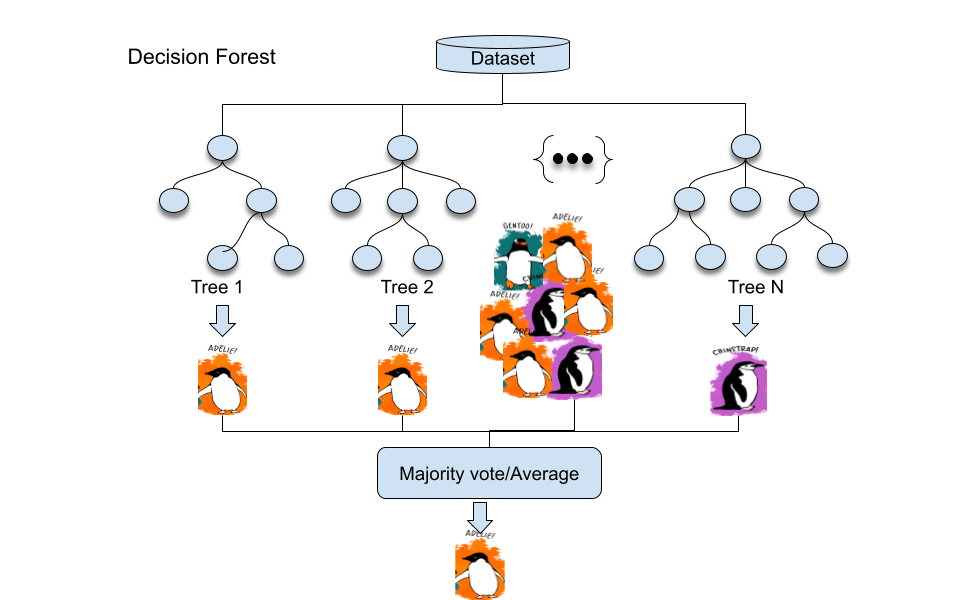

[TensorFlow Decision Forests (`TF-DF`)](https://www.tensorflow.org/decision_forests) is a library for the training Decision Forest models.


## STEP 1: Setup the environment 👩🏾‍💻✨


### Install TensorFlow Decision Forest library (TF-DF) 🌲🌲🌲📥

Run the following cell to install the library.

In [2]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.2 MB 4.5 MB/s 
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 6.0 MB 48.0 MB/s 
     |████████████████████████████████| 439 kB 78.1 MB/s 
     |████████████████████████████████| 1.7 MB 59.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

### Import libraries

Some common libraries we'll be using today are [pandas](https://pandas.pydata.org/), [TensorFlow](https://tensorflow.org/) (sometimes abbreviated ```tf```), [numpy](https://numpy.org/), and there are many more!

Let's load these libraries and load our data into a pandas [dataframe (`df`)](https://www.geeksforgeeks.org/python-pandas-dataframe/), which is a format our python can read instead of a csv, and we can then train a model on this df.

In [3]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math


## STEP 2: Get Data 🐧🐧🐧📊

First things first - **all ML models need DATA!**

It might seem counter intuitive, but the most amount of time most data scientists spend in making ML models is actually in understanding the data and "cleaning" it to make it machine-readable. I would even say when I train ML models, I spend ~80% of my time in the Data + Data Cleaning phases!

It's important to understand your data because this is the only source your Machine Learning model will learn patterns and trends from - so if it has some weird pattern (half of the values are missing, or in different formats, etc) it will learn those weird patterns.

While in the "Data" Phase, some design questions you might want to consider are:
1. **Where does your data come from? Who collected it? Why did they collect it?**

You can imagine that a zoologist or a penguin enthusiast might both have a database of penguin attributes and species, but they probably use them in different ways. Maybe the zoologist made the database to keep track of the penguin conditions in the zoo, while an enthusiast might be interested in features that identify different types of penguins.

2. **What is the type() of each of the columns (aka "features")? Are they all numbers (integers or "int", "float")? words ("strings")?**

This matters to ML models - we need to ensure that the computer is able to read each of the columns in the way that we're perceiving them (like, if it is a number '5' it should be read as an int, not a string)

3. **What questions can this data answer?**

This is important because we can't train a model on this data and ask questions about things not seen in the data! for instance, if we have a dataset that describes penguins we can't ask questions about hippos - the model only knows about penguins!

### Load the dataset ...and convert it in a tf.Dataset!

This dataset is very small (300 examples) and stored as a .csv-like file. Therefore, use Pandas to load it.

**Note:** Pandas is practical as you don't have to type in name of the input features to load them. For larger datasets (>1M examples), using the
[TensorFlow Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) to read the files may be better suited.

Let's assemble the dataset into a csv file (i.e. add the header), and load it:

In [4]:
# Download the dataset
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv

# Load a dataset into a Pandas Dataframe.
df = pd.read_csv("/tmp/penguins.csv")

# Display the first 5 examples.
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
#this returns the entireeeeee dataframe!
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


From this initial look, it doesn't seem like year is going to be that predictive of the species.

### Explore your data 🧭✨🕵🏻‍♀️

Exploring your data, or Exploratory Data Analysis (`EDA`), is an important part of the ML process!

When we show the entire dataframe, **it's too many animals to view all at once, and it's only 344!** (remember, python starts counting at 0, and our first anmial is numbered 0)  Just imagine if we had a dataset of 1000 animals, or 5 million! - there's no way we could look at EVERY row!

One thing data scientists do is explore the data in the form of **summary statistics**, which we can use directly on the pandas dataframe.

Below is some sample code to help you explore your data, using the function [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). You can groupby() on the entire dataframe by a certain feature, like by each Species, and do calculations per species

In [6]:
#Let's group the dataframe by the column "species" of penguins!
# with the COUNT of how many unique values there are in each column
#(i.e., 'Adelie Penguins...with a bill length recorded,' or 'Chinstrap penguins... with a body mass recorded')
#(hint: they should all be the same unless we have null! Can you spot where they AREN'T the same?)
df.groupby(['species']).count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
species,,,,,,,
Adelie,152,151,151,151,151,146,152
Chinstrap,68,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119,124


In [7]:
#here's another way to do groupby the mean number - but some of our columns are missing!
# we are missing columns like "island" because they are not numeric - they are strings (aka words)
df.groupby(['species']).mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252,2008.013158
Chinstrap,48.833824,18.420588,195.823529,3733.088235,2007.970588
Gentoo,47.504878,14.982114,217.186992,5076.016260,2008.080645


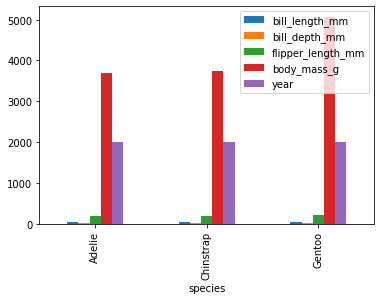

In [8]:
#Sometimes it's hard to just read a table, let's look at a graph of the average values...
df.groupby('species').mean().plot(kind='bar')

In [9]:
# let's look at the FIRST row (row 0) of the data frame - what is in that row?
df.iloc[0]
#this output reads:
#Colname        Value

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       male
year                      2007
Name: 0, dtype: object

In [10]:
#Let's look at all of the different variables
#this will let us know if there are any NaN (null/missing) values!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


### Data cleaning 🧹✨

The dataset contains a mix of numerical (e.g. `bill_depth_mm`), categorical
(e.g. `island`) and missing features. TF-DF supports all these feature types natively (differently than NN based models), therefore there is no need for preprocessing in the form of one-hot encoding, normalization or extra `is_present` feature.



In [11]:
df_clean = df.dropna()

In [12]:
df_clean = df_clean.drop(columns=['year'])

In [13]:
df_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [15]:
# since we only lost 11 "null" rows, let's make our df_clean be our main df!
df = df_clean

**Labels are a bit different:** Keras metrics expect integers. The label (`species`) is stored as a string, so let's convert it into an integer to make it machine readable. This will allow us to use `TFDF` to predict what species it is!

In [16]:
# Encode the categorical labels as integers.

# Details:
# This stage is necessary if your classification label is represented as a
# string since Keras expects integer classification labels.
# When using `pd_dataframe_to_tf_dataset` (see below), this step can be skipped.

# Name of the label column.
label = "species"

classes = df[label].unique().tolist()
print(f"Label classes: {classes}")

df[label] = df[label].map(classes.index)

Label classes: ['Adelie', 'Gentoo', 'Chinstrap']


### Training vs Testing Data 🚂🆚🧪

In order to train a ML model we need data! However, **we don't want to give 100% of our data to the model to train and learn patterns on**, we hold out a "testing data" set that comes from the same data source so we can see how well the model performs, and only give the model 70% of the full data set to train on (or "training data").

We need to use the same data source because we know what the correct answer might be, therefore we can calculate things like accuracy of how well the model predicted categories of data it has not been trained on!

Typically, we can use the ratio of 70% of our data can be training data, and 30% of our data can be testing data, or data the model has NEVER seen before that we're going to evaluate how well the model performs on it. We want to be sure that the data is randomized as well, since we don't want, say, the last 30% of the rows to be Adelie Penguins and, if that is our test data, our training data would not include Adelie Penguins!


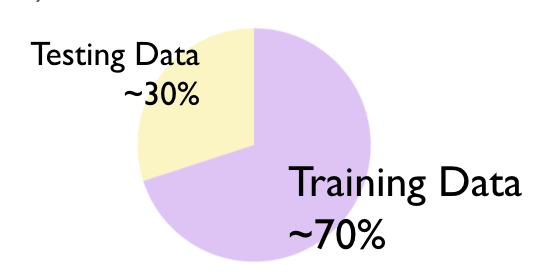

In [17]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

226 examples in training, 107 examples for testing.


And finally, convert the pandas dataframe (`pd.Dataframe`) into tensorflow datasets (`tf.data.Dataset`):

In [18]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

**Notes:** Recall that `pd_dataframe_to_tf_dataset` converts string labels to integers if necessary.

If you want to create the `tf.data.Dataset` yourself, there are a couple of things to remember:

- The learning algorithms work with a one-epoch dataset and without shuffling.
- The batch size does not impact the training algorithm, but a small value might slow down reading the dataset.


## STEP 3: Train the model 🏋🏻‍♀️💪🤖

When we say "train the model" it isn't really like we're writing the code ourselves to get the math equation. TensorFlow, Keras, and other libraries make it REALLY EASY to "train models" because they have functions already written to help us easily find those patterns and get the models! Let's run the one below to make a RandomForest!

In [19]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=1) #verbose is just an argument about how long you want the output to be!

# Train the model.
model_1.fit(x=train_ds)

Use /tmp/tmptxzkgo74 as temporary training directory
Reading training dataset...


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training dataset read in 0:00:03.741879. Found 226 examples.
Training model...
Model trained in 0:00:00.083081
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


Remarks

-   No input features are specified. Therefore, all the columns will be used as
    input features except for the label. The feature used by the model are shown
    in the training logs and in the `model.summary()`.
-   DFs consume natively numerical, categorical, categorical-set features and
    missing-values. Numerical features do not need to be normalized. Categorical
    string values do not need to be encoded in a dictionary.
-   No training hyper-parameters are specified. Therefore the default
    hyper-parameters will be used. Default hyper-parameters provide
    reasonable results in most situations.
-   Calling `compile` on the model before the `fit` is optional. Compile can be
    used to provide extra evaluation metrics.
-   Training algorithms do not need validation datasets. If a validation dataset
    is provided, it will only be used to show metrics.
-   Tweak the `verbose` argument to `RandomForestModel` to control the amount of
    displayed training logs. Set `verbose=0` to hide most of the logs. Set
    `verbose=2` to show all the logs.

**Note:** A *Categorical-Set* feature is composed of a set of categorical values (while a *Categorical* is only one value). More details and examples are given later.

## STEP 4: Evaluate your model 🕵🏾‍♀️🐧❓📈


### Evaluate the model with the Testing Data 🆕🐧

We are now ready to see how this model performs! We call this evaluating the model. Every type of model has a [different way it can be evaluated](https://keras.io/api/metrics/), but this Decision Forest can be evaluated by this [sample code from the tutorial](https://www.tensorflow.org/decision_forests/tutorials/beginner_colab) :)

Let's evaluate our model on the Testing Data (the 30% we DID NOT train the model on)

In [20]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 308ms/step - loss: 0.0000e+00 - accuracy: 1.0000

loss: 0.0000
accuracy: 1.0000


### Plot the model 📊📈👀

Plotting a decision tree and following the first branches helps learning about decision forests. In some cases, plotting a model can even be used for debugging.

Because of the difference in the way they are trained, some models are more interesting to plan than others. Because of the noise injected during training and the depth of the trees, plotting Random Forest is less informative than plotting a CART or the first tree of a Gradient Boosted Tree.

Never the less, let's plot the first tree of our Random Forest model:

In [21]:
#remember, these are the the three "classes" of our Penguins!
print(f"Label classes: {classes}")

Label classes: ['Adelie', 'Gentoo', 'Chinstrap']


In [22]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=5)

The root node on the left contains the first condition, number of examples and label distribution (the red-blue-green bar).

Examples that evaluates true to the first condition are branched to the green path. The other ones are branched to the red path.

The deeper the node, the more `pure` they become i.e. the label distribution is biased toward a subset of classes.

**Note:** Hover the mouse on top of the plot for details.

### Plotting the training logs 📉📈

The training logs show the quality of the model (e.g. accuracy evaluated on the out-of-bag or validation dataset) according to the number of trees in the model. These logs are helpful to study the balance between model size and model quality.

The logs are available in multiple ways:

1. Displayed in during training if `fit()` is wrapped in `with sys_pipes():`.
1. At the end of the model summary i.e. `model.summary()`.
1. Programmatically, using the model inspector i.e. `model.make_inspector().training_logs()`.
1. Via TensorBoard.

Let's plot it using the `matplotlib` library!


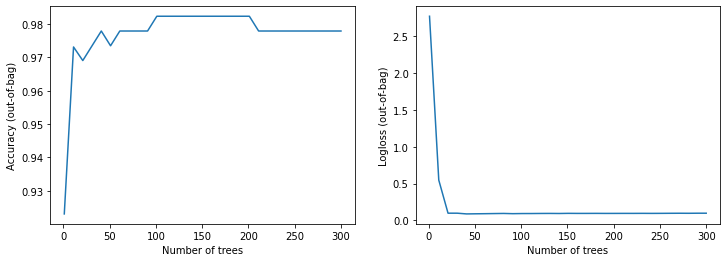

In [23]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

This dataset is small. You can see the model converging almost immediately.

### Let's use TensorBoard! 🏄✨

In [24]:
# This cell start TensorBoard that can be slow.
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [25]:
# Clear existing results (if any)
!rm -fr "/tmp/tensorboard_logs"

In [26]:
# Export the meta-data to tensorboard.
model_1.make_inspector().export_to_tensorboard("/tmp/tensorboard_logs")

In [27]:
# docs_infra: no_execute
# Start a tensorboard instance.
%tensorboard --logdir "/tmp/tensorboard_logs"

<IPython.core.display.Javascript object>

This dataset is small. You can see the model converging almost immediately.


## STEP 5: What's next? 🐧🐧🐧🏆✨

### Re-train the model with a different learning algorithm

The learning algorithm is defined by the model class. For
example, `tfdf.keras.RandomForestModel()` trains a Random Forest, while
`tfdf.keras.GradientBoostedTreesModel()` trains a Gradient Boosted Decision
Trees model.

The learning algorithms are listed by calling `tfdf.keras.get_all_models()` or in the
[learner list](https://github.com/google/yggdrasil-decision-forests/blob/main/documentation/learners.md).

In [28]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

The description of the learning algorithms and their hyper-parameters are also available in the [API reference](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf) and builtin help.

### Using a subset of features

The previous example did not specify the features, so all the columns were used
as input feature (except for the label). The following example shows how to
specify input features.

In [29]:
feature_1 = tfdf.keras.FeatureUsage(name="bill_length_mm")
feature_2 = tfdf.keras.FeatureUsage(name="island")

all_features = [feature_1, feature_2]

# Note: This model is only trained with two features. It will not be as good as
# the one trained on all features.

model_2 = tfdf.keras.GradientBoostedTreesModel(
    features=all_features, exclude_non_specified_features=True)

model_2.compile(metrics=["accuracy"])
model_2.fit(x=train_ds, validation_data=test_ds)

print(model_2.evaluate(test_ds, return_dict=True))

Use /tmp/tmp6tpnuyjw as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.136215. Found 226 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(107, shape=(), dtype=int32)
Validation dataset read in 0:00:00.201866. Found 107 examples.
Training model...
Model trained in 0:00:00.158576
Compiling model...
Model compiled.
1/1 [==============================] - 0s 82ms/step - loss: 0.0000e+00 - accuracy: 0.9720
{'loss': 0.0, 'accuracy': 0.9719626307487488}


**Note:** As expected, the accuracy is lower than previously.

**TF-DF** attaches a **semantics** to each feature. This semantics controls how
the feature is used by the model. The following semantics are currently supported:

-   **Numerical**: Generally for quantities or counts with full ordering. For
    example, the age of a person, or the number of items in a bag. Can be a
    float or an integer. Missing values are represented with float(Nan) or with
    an empty sparse tensor.
-   **Categorical**: Generally for a type/class in finite set of possible values
    without ordering. For example, the color RED in the set {RED, BLUE, GREEN}.
    Can be a string or an integer. Missing values are represented as "" (empty
    sting), value -2 or with an empty sparse tensor.
-   **Categorical-Set**: A set of categorical values. Great to represent
    tokenized text. Can be a string or an integer in a sparse tensor or a
    ragged tensor (recommended). The order/index of each item doesn't matter.

If not specified, the semantics is inferred from the representation type and shown in the training logs:

- int, float (dense or sparse) → Numerical semantics.
- str (dense or sparse) → Categorical semantics
- int, str (ragged) → Categorical-Set semantics

In some cases, the inferred semantics is incorrect. For example: An Enum stored as an integer is semantically categorical, but it will be detected as numerical. In this case, you should specify the semantic argument in the input. The `education_num` field of the Adult dataset is classical example.

<center>
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="600"/></center>

# ..but wait there's more!!

The fun doesn't have to stop here! There are a TON of free, online resources to help you get started and learn ML!

🆓 Learning Resources:
* [Intro to Machine learning](https://developers.google.com/codelabs/tensorflow-1-helloworld#1) codelab.
* [Zero to Hero Intro to ML](https://www.youtube.com/watch?v=KNAWp2S3w94) youtube videos that guide you to building your first deep learning models.
* [Basics of machine learning with TensorFlow](https://www.tensorflow.org/resources/learn-ml/basics-of-machine-learning) provides other resources to dive deeper.
* [Problem Framing](https://developers.google.com/machine-learning/problem-framing) - how to define your problem in ML terms, and find the appropriate solution.
* [Kaggle Competitions](https://www.kaggle.com/competitions)! If you're ready to dive in and start coding, check out the "competitions" on Kaggle! It's a great way to apply what you've learned with a community of other learners.

📗 Explore your data with tools from [PAIR](https://pair.withgoogle.com/)!
* [Know Your Data](https://knowyourdata-tfds.withgoogle.com/)
* [Language Interpretability Tool](https://pair-code.github.io/lit/)!

The community of developers on [TensorFlow Forum](https://discuss.tensorflow.org/) is a great resource if you have questions or run into issues too :)

### Thank you 💖✨✨

Congratulations on starting your ML journey with TF! We're excited to have you here!

Big thanks to Joana, Laurence, Khan, Josh, the TensorFlow team, and everyone who made this workshop and [WiML Symposium](https://eventsonair.withgoogle.com/events/women-in-machine-learning-2022) possible.

And thank you to ALL OF YOU for your time and attention! Please share back what you learned!

*This notebook is made from many different **free** examples out there, like [this](https://www.tensorflow.org/decision_forests/tutorials/beginner_colab) and [this](http://bit.ly/whatpartsofMLcanbedesigned)!*

Questions? Comments? Ideas? Inspos?

*   ask questions in chat!
*   [TensorFlow Forum](https://discuss.tensorflow.org/)
*   Tag us on twitter! @TensorFlow @michelleRcarney #WiMLSymposium -- more!